In [31]:
import sklearn
import scipy
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

# read in imputed data
df = pd.read_csv("courses.csv")

# rename columns for easier typing
df = df.rename(columns={"Year": "year", "Term.Number": "term", "Department": "department", "Course.Number": "course_number", "Number.of.Sections": "number_sections", "Enrollments": "enrollments", "Median.GPA.Points": "median_gpa", "Average.Section.Size": "avg_size"})

df.head(20)

,year,term,department,course_number,number_sections,enrollments,median_gpa,avg_size
0,2021,3,AAAS,31.10,1,14,4.000000,14.0
1,2021,3,AAAS,31.90,1,17,4.000000,17.0
2,2021,3,AAAS,60.01,1,19,3.666667,14.0
3,2021,3,AAAS,62.75,1,29,4.000000,29.0
4,2021,3,AAAS,65.65,1,16,3.333333,16.0
5,2021,3,AAAS,88.19,1,19,4.000000,19.0
6,2021,3,ANTH,3.00,1,58,3.666667,58.0
7,2021,3,ANTH,18.00,1,16,4.000000,16.0
8,2021,3,NaN,12.19,1,24,4.000000,24.0
9,2021,3,ARTH,17.06,1,21,3.666667,21.0


# Data Visualization

In [2]:
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=318079 sha256=28f150327d45e4c7dec1e30409bd37c164f0fe7f47a68ee215efb3e1294bdd94
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


In [3]:
# suppress warnings that come with installing the wordcloud package 
from rpy2.rinterface_lib.callbacks import logger as rpy2_logger
import logging
rpy2_logger.setLevel(logging.ERROR)

In [5]:
%%R
install.packages("ggrepel")

In [11]:
%%R 
library('tidyverse') 
library('ggrepel')
df <- read_csv('courses.csv') # load data 
df <- df %>% rename('year'=Year, 
                    'term'=`Term.Number`, 
                    'department'=Department, 
                    'course_number'=`Course.Number`, 
                    'num_sections'=`Number.of.Sections`, 
                    'enrollments'=Enrollments,
                    'median_gpa'=`Median.GPA.Points`,
                    'avg_size'=`Average.Section.Size`) # rename columns for easier typing
#df <- df %>% mutate(continuous_term=(term + ifelse(year == 2021, 0, 4)))

df

Rows: 1560 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Department
dbl (7): Year, Term.Number, Course.Number, Number.of.Sections, Enrollments, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 1,560 × 8
    year  term department course_number num_sections enrollments median_gpa
   <dbl> <dbl> <chr>              <dbl>        <dbl>       <dbl>      <dbl>
 1  2021     3 AAAS                31.1            1          14       4   
 2  2021     3 AAAS                31.9            1          17       4   
 3  2021     3 AAAS                60.0            1          19       3.67
 4  2021     3 AAAS                62.8            1          29       4   
 5  2021     3 AAAS                65.6            1          16       3.33
 6  2021     3 AAAS                88.2            1          19       4 

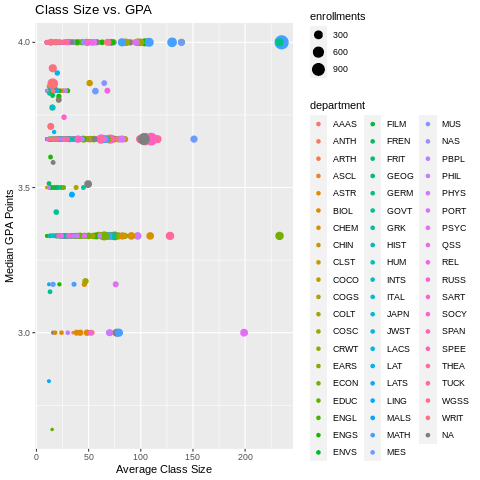

In [15]:
%%R
# plotting class size vs. GPA points
gg <- ggplot(df, aes(x=avg_size, y=median_gpa)) + geom_point(aes(col=department, size=enrollments)) + labs(y="Median GPA Points", x="Average Class Size", title="Class Size vs. GPA")
plot(gg)

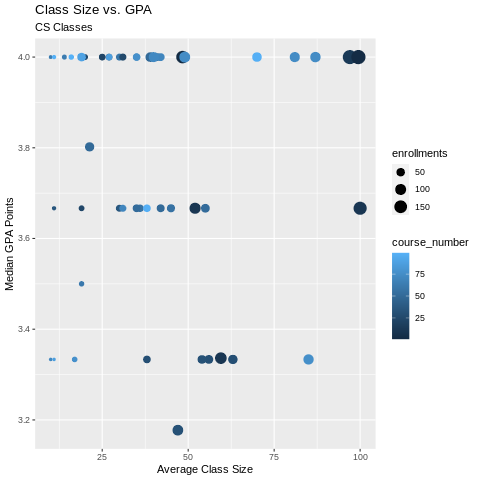

In [21]:
%%R
# plotting class size vs. GPA points for CS classes only
cs_df <- df %>% filter(department == "COSC") 
gg <- ggplot(cs_df, aes(x=avg_size, y=median_gpa)) + geom_point(aes(col=course_number, size=enrollments)) + labs(subtitle="CS Classes", y="Median GPA Points", x="Average Class Size", title="Class Size vs. GPA")
plot(gg)

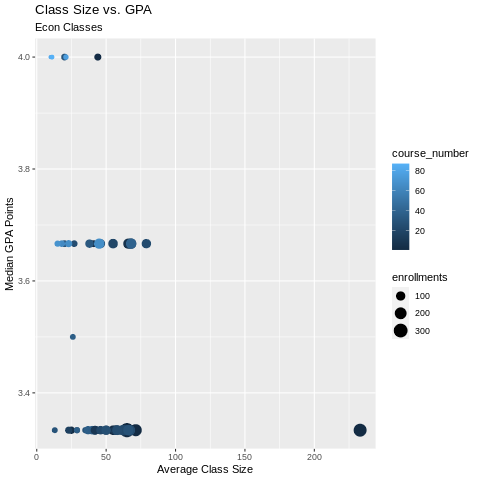

In [20]:
%%R
# plotting class size vs. GPA points for ECON classes only
cs_df <- df %>% filter(department == "ECON") 
gg <- ggplot(cs_df, aes(x=avg_size, y=median_gpa)) + geom_point(aes(col=course_number, size=enrollments)) + labs(subtitle="Econ Classes", y="Median GPA Points", x="Average Class Size", title="Class Size vs. GPA")
plot(gg)

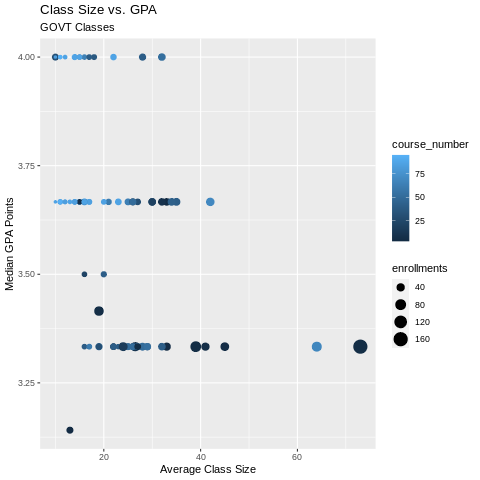

In [23]:
%%R
# plotting class size vs. GPA points for GOVT classes only
cs_df <- df %>% filter(department == "GOVT") 
gg <- ggplot(cs_df, aes(x=avg_size, y=median_gpa)) + geom_point(aes(col=course_number, size=enrollments)) + labs(subtitle="GOVT Classes", y="Median GPA Points", x="Average Class Size", title="Class Size vs. GPA")
plot(gg)

# Statistical Analysis

In [32]:
# Determine correlation between class size and gpa points
print('Pearson coeff: ' + str(round(scipy.stats.pearsonr(df['avg_size'], df['median_gpa'])[0], 3)))
print('Spearman coeff: ' + str(round(scipy.stats.spearmanr(df['avg_size'], df['median_gpa'])[0], 3)))

Pearson coeff: -0.219
Spearman coeff: -0.258


# Machine Learning

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

econ_courses = df.loc[df['department'] == "ECON"]
govt_courses = df.loc[df['department'] == "GOVT"]

In [68]:
# regression on all courses

# allocate training and testing sets
train, test = train_test_split(df[['avg_size', 'median_gpa']], test_size=0.2)

# train model using training sets
regr = LinearRegression()
regr.fit(np.array(train["avg_size"].tolist()).reshape(-1, 1), train['median_gpa'])

# get predictions
test_pred = reg.predict(np.array(test["avg_size"].tolist()).reshape(-1, 1))

# print coefficient
print("Coefficient: ", regr.coef_)

# print mean squared error (MSE) and mean absolute error (MAE)
print("Mean absolute error: %.2f" % mean_absolute_error(test["median_gpa"], test_pred))
print("Mean squared error: %.2f" % mean_squared_error(test["median_gpa"], test_pred))

Coefficient:  [-0.00286568]
Mean absolute error: 0.22
Mean squared error: 0.07


Text(0, 0.5, 'Median GPA Points')

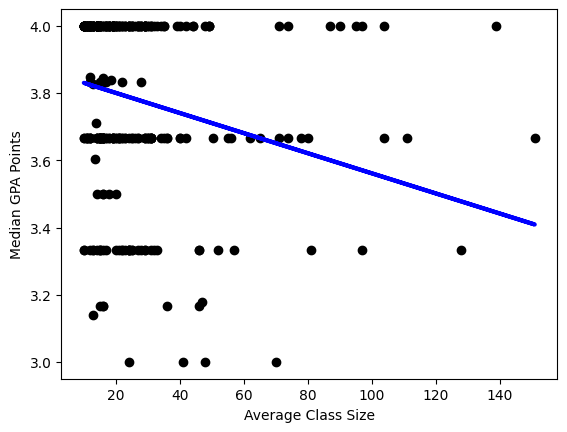

In [69]:
# plot regression for all courses on test data
plt.scatter(test['avg_size'], test['median_gpa'], color="black")
plt.plot(test['avg_size'], test_pred, color="blue", linewidth=3)
plt.xlabel("Average Class Size")
plt.ylabel("Median GPA Points")

In [52]:
# get courses in CS department
cs_courses = df.loc[df['department'] == "COSC"]
cs_courses.head()

,year,term,department,course_number,number_sections,enrollments,median_gpa,avg_size
30,2021,3,COSC,21.0,1,25,4.000000,25.0
31,2021,3,COSC,30.0,1,55,3.333333,63.0
32,2021,3,COSC,50.0,1,41,4.000000,41.0
33,2021,3,COSC,56.0,1,36,3.666667,36.0
34,2021,3,COSC,59.0,1,30,4.000000,30.0


In [64]:
# allocate training and testing sets
train, test = train_test_split(cs_courses[['avg_size', 'median_gpa']], test_size=0.3)

# train model using training sets
regr = LinearRegression()
regr.fit(np.array(train["avg_size"].tolist()).reshape(-1, 1), train['median_gpa'])

# get predictions
test_pred = reg.predict(np.array(test["avg_size"].tolist()).reshape(-1, 1))

# print coefficient
print("Coefficient: ", regr.coef_)

# print mean squared error (MSE) and mean absolute error (MAE)
print("Mean absolute error: %.2f" % mean_absolute_error(test["median_gpa"], test_pred))
print("Mean squared error: %.2f" % mean_squared_error(test["median_gpa"], test_pred))

Coefficient:  [0.00016885]
Mean absolute error: 0.20
Mean squared error: 0.05


Text(0, 0.5, 'Median GPA Points')

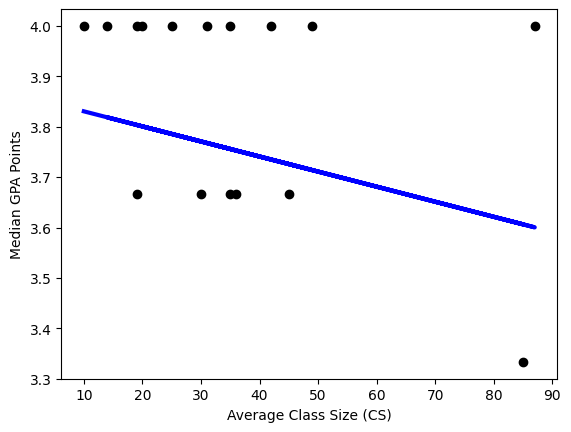

In [65]:
# plot regression for CS courses on test data
plt.scatter(test['avg_size'], test['median_gpa'], color="black")
plt.plot(test['avg_size'], test_pred, color="blue", linewidth=3)
plt.xlabel("Average Class Size (CS)")
plt.ylabel("Median GPA Points")

In [66]:
# get courses in ECON department
econ_courses = df.loc[df['department'] == "ECON"]
econ_courses.head()

,year,term,department,course_number,number_sections,enrollments,median_gpa,avg_size
38,2021,3,ECON,20.0,2,84,3.333333,42.0
39,2021,3,ECON,2.0,2,110,3.333333,55.0
41,2021,3,ECON,26.0,2,92,3.666667,46.0
260,2021,4,ECON,1.0,5,325,3.333333,65.0
261,2021,4,ECON,2.0,1,42,3.666667,41.0


In [67]:
# allocate training and testing sets
train, test = train_test_split(econ_courses[['avg_size', 'median_gpa']], test_size=0.3)

# train model using training sets
regr = LinearRegression()
regr.fit(np.array(train["avg_size"].tolist()).reshape(-1, 1), train['median_gpa'])

# get predictions
test_pred = reg.predict(np.array(test["avg_size"].tolist()).reshape(-1, 1))

# print coefficient
print("Coefficient: ", regr.coef_)

# print mean squared error (MSE) and mean absolute error (MAE)
print("Mean absolute error: %.2f" % mean_absolute_error(test["median_gpa"], test_pred))
print("Mean squared error: %.2f" % mean_squared_error(test["median_gpa"], test_pred))

Coefficient:  [-0.00285377]
Mean absolute error: 0.27
Mean squared error: 0.10


Text(0, 0.5, 'Median GPA Points')

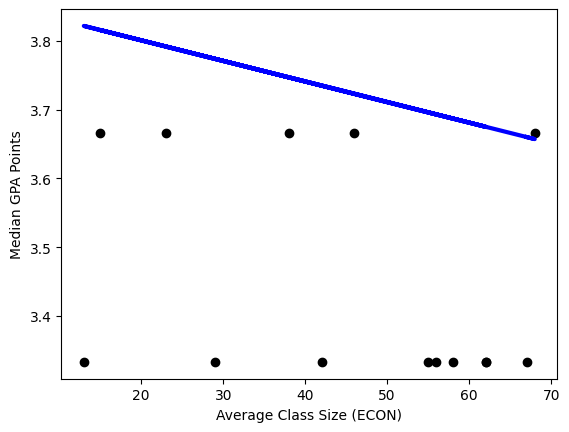

In [63]:
# plot regression for econ courses on test data
plt.scatter(test['avg_size'], test['median_gpa'], color="black")
plt.plot(test['avg_size'], test_pred, color="blue", linewidth=3)
plt.xlabel("Average Class Size (ECON)")
plt.ylabel("Median GPA Points")

In [ ]:
# get courses in GOVT department 
govt_courses = df.loc[df['department'] == "GOVT"]
govt_courses.head()

In [70]:
# allocate training and testing sets
train, test = train_test_split(govt_courses[['avg_size', 'median_gpa']], test_size=0.3)

# train model using training sets
regr = LinearRegression()
regr.fit(np.array(train["avg_size"].tolist()).reshape(-1, 1), train['median_gpa'])

# get predictions
test_pred = reg.predict(np.array(test["avg_size"].tolist()).reshape(-1, 1))

# print coefficient
print("Coefficient: ", regr.coef_)

# print mean squared error (MSE) and mean absolute error (MAE)
print("Mean absolute error: %.2f" % mean_absolute_error(test["median_gpa"], test_pred))
print("Mean squared error: %.2f" % mean_squared_error(test["median_gpa"], test_pred))

Coefficient:  [-0.00740967]
Mean absolute error: 0.24
Mean squared error: 0.07


Text(0, 0.5, 'Median GPA Points')

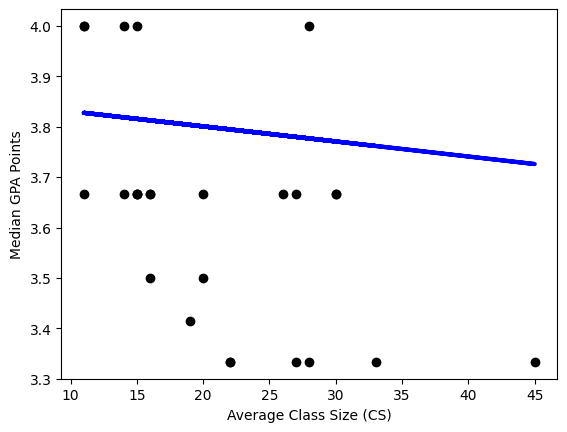

In [71]:
# plot regression for GOVT courses on test data
plt.scatter(test['avg_size'], test['median_gpa'], color="black")
plt.plot(test['avg_size'], test_pred, color="blue", linewidth=3)
plt.xlabel("Average Class Size (CS)")
plt.ylabel("Median GPA Points")